In [1]:
df<-read.csv('d:/data/customer/customer.csv')
dim(df)
head(df)

Int.l.Plan,VMail.Plan,VMail.Message,Day.Mins,Day.Calls,Day.Charge,Eve.Mins,Eve.Calls,Eve.Charge,Night.Mins,Night.Calls,Night.Charge,Intl.Mins,Intl.Calls,Intl.Charge,CustServ.Calls,Churn
0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0
1,0,0,223.4,98,37.98,220.6,101,18.75,203.9,118,9.18,6.3,6,1.70,0,0


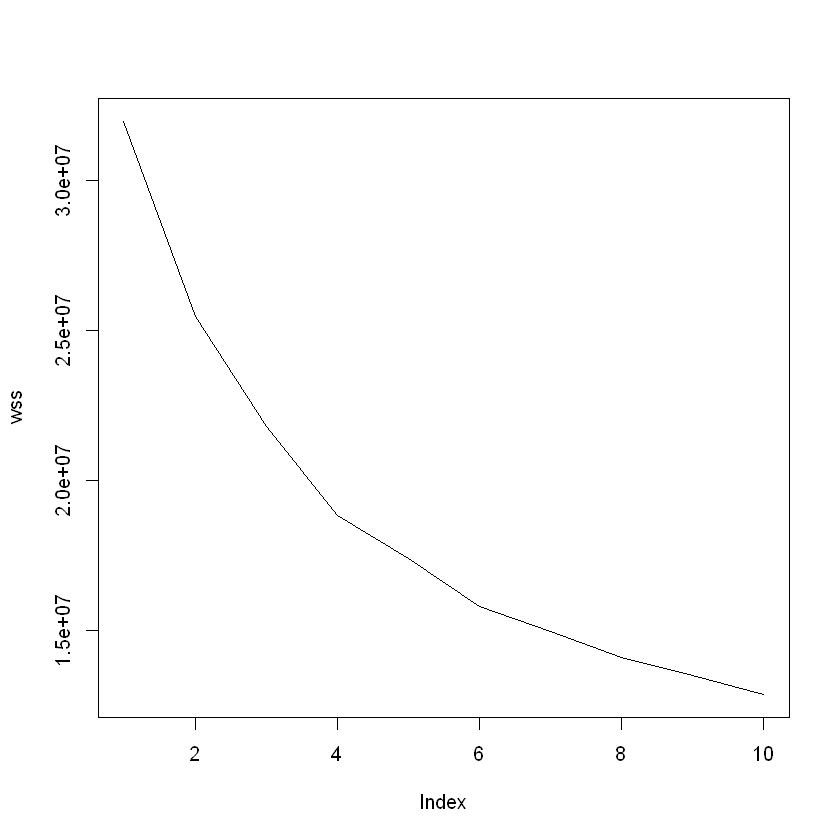

In [2]:
#1.wss
result<-NULL
for(k in 1:10){
    result[[k]]<-kmeans(df[,-17],k)
}
wss<-numeric(10)
for(k in 1:10){
    wss[k]<-result[[k]]$tot.withinss
}
plot(wss,type='l') #기울기가 크게 꺾이는 k값

[1] 0.1861686

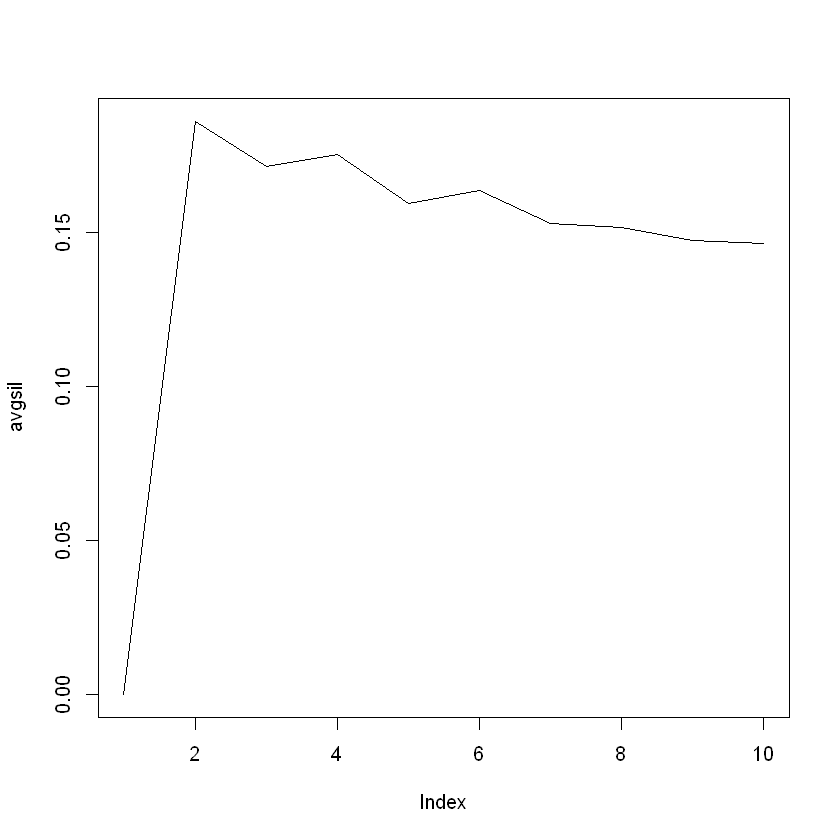

In [3]:
#2.실루엣 포인트
library(cluster)
avgsil<-numeric(10)
for(k in 2:10){
    si<-summary(silhouette(result[[k]]$cluster,dist(df[,-17])))
    avgsil[k]<-si$avg.width
}
max(avgsil)
plot(avgsil,type='l') #실루엣 포인트가 최대인 k 값

In [ ]:
library(factoextra)
set.seed(123)
fviz_nbclust(df[,-17],FUN=kmeans,method='wss')
fviz_nbclust(df[,-17],FUN=kmeans,method='silhouette')

In [ ]:
#산점도 행렬(군집갯수 2)
plot(df[,-17],pch=result[[2]]$cluster,col=result[[2]]$cluster)

In [ ]:
#군집갯수 2를 적용한 kmeans 모형
set.seed(123)
model<-kmeans(df[,-17],centers=2)
model
model$centers

In [ ]:
#모형에서 예측한 값 숫자형 1,2를 0,1 캍고리형으로 변환
df$cluster<- as.factor(model$cluster -1)

In [ ]:
#예측정확도 확인
table(df$churn, df$cluster)
mean(df$Churn, df$cluster)